In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [24]:
interestingness = []
difficulty = []
std = []
variance = []
true_diff = []
true_difficulty = {'easy':1, 'medium':3, 'hard':5, 'veryhard':7, 'insane':9}

In [25]:
for sudoku in os.listdir('Data'):
    for full_path in os.listdir('Data/'+sudoku):
        df = pd.read_csv('Data/'+sudoku+'/'+full_path)
        
#         print(df['time'].min())
        if df['time'].min() == -1.0:
            time = df[df['type']=='number_add']['time']
            scale = time.shift(1)
            scale[0] = 1200
            time_intervals = scale - time
            
            true_diff.append(true_difficulty[sudoku[:-1]])
            
            std.append(time_intervals.std())
            variance.append(time_intervals.var())
            difficulty.append(df[df['type']=='difficulty']['number'].values[0])
            interestingness.append(df[df['type']=='enjoy']['number'].values[0])

In [22]:
def plot_corr(x, y, xname, yname, file_name):
    b, m = np.polynomial.polynomial.polyfit(x, y, 1)

    plt.plot(x, y,'.')
    plt.plot(x, b+m*np.array(x), '-')
    plt.xlabel(xname)
    plt.ylabel(yname)
    corr = np.corrcoef(x,y)
    print(corr)
    plt.text(1,4.6, "Correlation Coefficient: " + str(corr[0][1]))
    plt.savefig(file_name)

[[ 1.         -0.53342898]
 [-0.53342898  1.        ]]


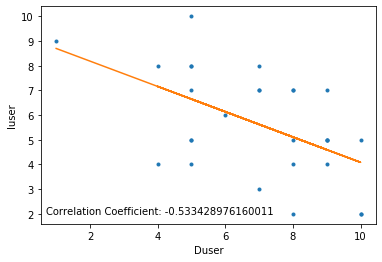

In [156]:
plot_corr(difficulty, interestingness, 'Duser', 'Iuser', 'IDcorr.png')

[[1.         0.29723592]
 [0.29723592 1.        ]]


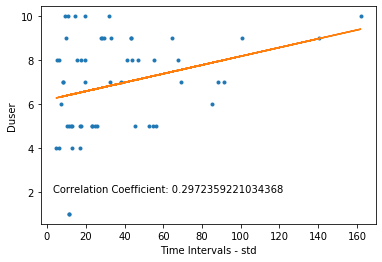

In [184]:
plot_corr(std, difficulty, 'Time Intervals - std', 'Duser', 'TDNcorr.png')

[[ 1.         -0.00608514]
 [-0.00608514  1.        ]]


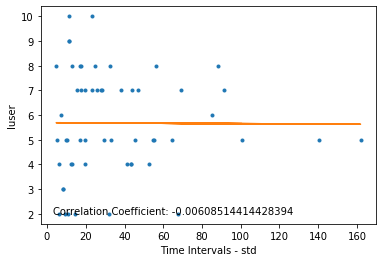

In [185]:
plot_corr(std, interestingness, 'Time Intervals - std', 'Iuser', 'TINcorr.png')

[[1.         0.08690173]
 [0.08690173 1.        ]]


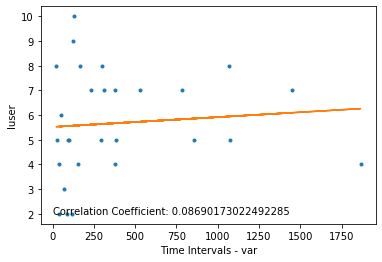

In [182]:
plot_corr(variance, interestingness, 'Time Intervals - var', 'Iuser', 'TvarIcorr.png')

[[1.         0.46463697]
 [0.46463697 1.        ]]


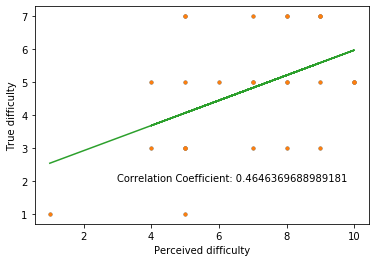

In [213]:
plt.plot(difficulty,true_diff,'.')
plot_corr(difficulty, true_diff, 'Perceived difficulty', 'True difficulty', 'PTdiffCorr.png')

In [202]:
diff = np.array(difficulty)/2

In [209]:
diff = np.ceil(diff)

In [210]:
from sklearn.metrics import classification_report

In [199]:
s = 0
for val in np.array(true_diff) - np.array(difficulty):
    s += val^2
print(s/len(true_diff))

-2.8214285714285716


In [212]:
print(classification_report(diff, true_diff))

              precision    recall  f1-score   support

         1.0       0.50      1.00      0.67         1
         2.0       0.00      0.00      0.00         2
         3.0       0.43      0.38      0.40         8
         4.0       0.00      0.00      0.00         9
         5.0       0.36      0.50      0.42         8
         7.0       0.00      0.00      0.00         0

   micro avg       0.29      0.29      0.29        28
   macro avg       0.22      0.31      0.25        28
weighted avg       0.24      0.29      0.26        28



In [28]:
pred_int = []
pred_diff = []
true_diff_a = []

pred_int.append(0.11417234184058633)
pred_diff.append(1.2504833307460321)
true_diff_a.append(1)

pred_int.append(0.1355639025237049)
pred_diff.append(1.579139389096265)
true_diff_a.append(2)

pred_int.append(0.319636738822876)
pred_diff.append(2.18143678649921)
true_diff_a.append(2)

pred_int.append(0.13714407950161647)
pred_diff.append(2.4752002927694)
true_diff_a.append(2)

pred_int.append(0.26999956876952613)
pred_diff.append(2.458025103402101)
true_diff_a.append(3)

pred_int.append(0.35829499362451617)
pred_diff.append(2.7751326772117864)
true_diff_a.append(3)

pred_int.append(0.3189692680607812)
pred_diff.append(2.5515640840496365)
true_diff_a.append(3)

pred_int.append(0.3367682923028645)
pred_diff.append(2.817421323570637)
true_diff_a.append(3)

pred_int.append(0.25089690461172265)
pred_diff.append(3.4694886689513713)
true_diff_a.append(4)

pred_int.append(0.1410311175953892)
pred_diff.append(2.507554901697954)
true_diff_a.append(4)

pred_int.append(0.25795483629758487)
pred_diff.append(2.287276816802609)
true_diff_a.append(4)

pred_int.append(0.29625763313314657)
pred_diff.append(2.0400404152020473)
true_diff_a.append(5)

pred_int.append(0.28278813876400677)
pred_diff.append(4.839835387731832)
true_diff_a.append(5)

[[1.         0.63651333]
 [0.63651333 1.        ]]


([<matplotlib.axis.XTick at 0x2b9fab17d68>,
 <a list of 5 Text xticklabel objects>)

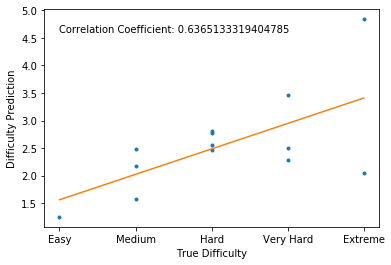

In [29]:
plot_corr(true_diff_a, pred_diff,"True Difficulty","Difficulty Prediction","qualityD.png")
plt.xticks(np.arange(1,5.1,1),['Easy','Medium','Hard','Very Hard','Extreme'] )

In [26]:
plot_corr(difficulty, pred_diff, "Perceived", 'Algorithm','qDperceivedVSalgo.png')

TypeError: expected x and y to have same length

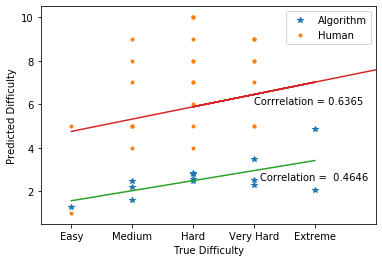

In [105]:
plt.plot(true_diff_a, pred_diff, '*', label='Algorithm')
plt.plot(true_diff_b, difficulty, '.', label='Human')

b, m = np.polynomial.polynomial.polyfit(true_diff_a, pred_diff, 1)
plt.plot(true_diff_a, b+m*np.array(true_diff_a), '-')
b, m = np.polynomial.polynomial.polyfit(true_diff_b, difficulty, 1)
plt.plot(true_diff, b+m*np.array(true_diff_b), '-')

plt.xlabel("True Difficulty")
plt.ylabel("Predicted Difficulty")
corr = np.corrcoef(true_diff_a, pred_diff)
corr1 = np.corrcoef(true_diff_b, difficulty)
plt.text(4,6, "Corrrelation = " + str(corr[0][1])[:6])
plt.text(4.1,2.5, "Correlation =  " + str(corr1[0][1])[:6])
plt.xlim([0.5,6])
plt.ylim([0.5,10.5])
plt.xticks(np.arange(1,5.1,1),['Easy','Medium','Hard','Very Hard','Extreme'])

plt.legend(loc='upper right')
plt.savefig("AlgHumanDiff.png")

In [56]:
true_diff_b = np.floor(np.array(true_diff)/2)

In [63]:
true_diff_b += 1

In [69]:
true_diff_b

array([1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 2., 2., 2.,
       2., 2., 2., 4., 4., 4., 4., 4., 4., 4., 4.])

Ks_2sampResult(statistic=0.22435897435897437, pvalue=0.6324350082872862)
36


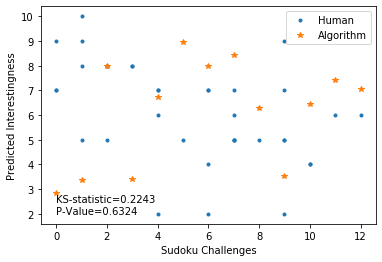

In [287]:
def plot_interesting(alg_int, typ='enjoy'):
    from scipy.stats import ks_2samp
    sudoku_list = ['easy1','medium1','medium3','medium4','hard1','hard3','hard4','hard5','veryhard1','veryhard2','veryhard3','insane2','insane8']
    x_human = []
    y_human = []
    for i, sudoku in enumerate(sudoku_list):
        path = 'rawdata/' + sudoku + '.csv'
        df = pd.read_csv(path,names=['user','time','type','index', 'value'])
        df = df[df['type']==typ]
        for _, row in df.iterrows():
            y_human.append(row['value'])
            x_human.append(i)
    plt.plot(x_human, y_human,'.',label='Human')
    mult = 25
    plt.plot(np.arange(0,max(x_human)+0.5,1), mult*np.array(alg_int),'*',label='Algorithm')
    ks_result = ks_2samp(y_human, mult*np.array(alg_int))
    print(ks_result)
    plt.legend(loc='upper right')
    
    plt.xlabel('Sudoku Challenges')
    plt.ylabel('Predicted Interestingness')
    
    plt.text(0,2,'KS-statistic='+str(ks_result[0])[:6]+'\nP-Value='+str(ks_result[1])[:6])
    print(len(x_human))
#     plt.savefig('KSresult.png')
plot_interesting(pred_int)

13

Ks_2sampResult(statistic=0.811965811965812, pvalue=6.70472796837629e-07)
[[1.         0.34574925]
 [0.34574925 1.        ]]
[[1.        0.6415523]
 [0.6415523 1.       ]]


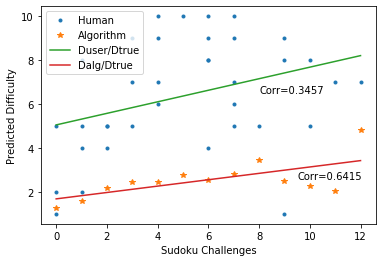

In [254]:
def plot_difficulty(alg_int, typ='difficulty'):
    from scipy.stats import ks_2samp
    sudoku_list = ['easy1','medium1','medium3','medium4','hard1','hard3','hard4','hard5','veryhard1','veryhard2','veryhard3','insane2','insane8']
    x_human = []
    y_human = []
    for i, sudoku in enumerate(sudoku_list):
        path = 'rawdata/' + sudoku + '.csv'
        df = pd.read_csv(path,names=['user','time','type','index', 'value'])
        df = df[df['type']==typ]
        for _, row in df.iterrows():
            y_human.append(row['value'])
            x_human.append(i)
    plt.plot(x_human, y_human,'.',label='Human')
    mult = 1
    plt.plot(np.arange(0,len(alg_int)), mult*np.array(alg_int),'*',label='Algorithm')
    ks_result = ks_2samp(y_human, mult*np.array(alg_int))
    print(ks_result)
    
    plt.xlabel('Sudoku Challenges')
    plt.ylabel('Predicted Difficulty')
    
    
#     plt.plot(x_human, y_human,'.')
    b, m = np.polynomial.polynomial.polyfit(x_human, y_human, 1)
    plt.plot(x_human, b+m*np.array(x_human), '-',label='Duser/Dtrue')
    corr = np.corrcoef(x_human,y_human)
    print(corr)
    plt.text(8,6.5,"Corr=" + str(corr[0][1])[:6])

    
    b, m = np.polynomial.polynomial.polyfit(np.arange(0,len(alg_int)),alg_int, 1)
    plt.plot(np.arange(0,len(alg_int)), b+m*np.array(np.arange(0,len(alg_int))), '-',label='Dalg/Dtrue')
    corr = np.corrcoef(alg_int,np.arange(0,len(alg_int)))
    plt.text(9.5,2.6,"Corr=" + str(corr[0][1])[:6])

    print(corr)
    
#     plt.plot(alg_int, b+m*np.array(alg_int), '-')
#     corr = np.corrcoef(x_human,y_human)

#     plt.xlabel(xname)
#     plt.ylabel(yname)
#     plt.text(1,4.6, "Correlation Coefficient: " + str(corr[0][1]))
    plt.legend(loc='upper left')

    
    plt.savefig('AlgHumanDiff.png')
    
plot_difficulty(pred_diff,'difficulty')

In [ ]:
pred_diff

In [259]:
import math

In [261]:
math.factorial(1)

1

In [268]:
def combination(n,p):
    return math.factorial(n)/(math.factorial(n-p) * math.factorial(p))
combination(45,22)

4116715363800.0

In [269]:
math.pow(2,45)

35184372088832.0

In [270]:
combination(45,22) < math.pow(2,45)

True

In [285]:
s = 0
for i in range(22,33):
    s += combination(45,i)
s * math.pow(0.7, 33)# / math.pow(2,45)

167496957.51407644

In [277]:
s = 0
for i in range(12,16):
    s += combination(20,i)
s

257754.0